In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('task3.csv')

In [42]:
print(df.head())


print('Description:')
print(df.describe())


print('Info:')
print(df.info())

     Month  Sales
0  1964-01   2815
1  1964-02   2672
2  1964-03   2755
3  1964-04   2721
4  1964-05   2946
Description:
              Sales
count    105.000000
mean    4761.152381
std     2553.502601
min     1413.000000
25%     3113.000000
50%     4217.000000
75%     5221.000000
max    13916.000000
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None


In [43]:
#We convert the `Month` column to datetime so Python can recognize it as a date, allowing us to easily perform time-based calculations and create accurate visualizations.
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [45]:
print(df.isnull().sum())

Month    0
Sales    0
dtype: int64


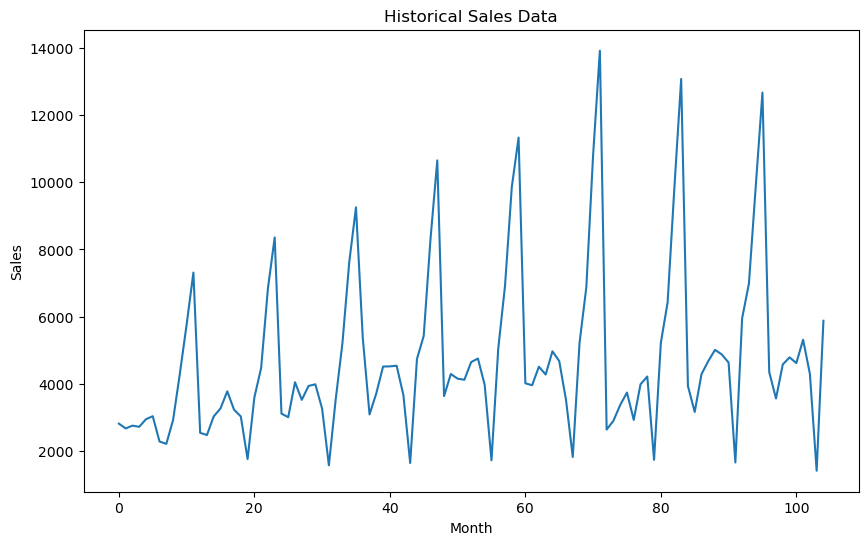

In [46]:

# Plot the historical sales data
plt.figure(figsize=(10, 6))
df['Sales'].plot()
plt.title('Historical Sales Data')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [47]:
split_date = '2023-01-01'  
train = df.loc[df['Month'] < split_date]
test = df.loc[df['Month'] >= split_date]

In [48]:
print(train['Sales'].head())  # Print the first few rows to check data integrity
print(train['Sales'].isna().sum()) 

0    2815
1    2672
2    2755
3    2721
4    2946
Name: Sales, dtype: int64
0


D:\DHA SUFFA UNIVERSITY\C THIRD SEMSETER\downloads software for labs\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


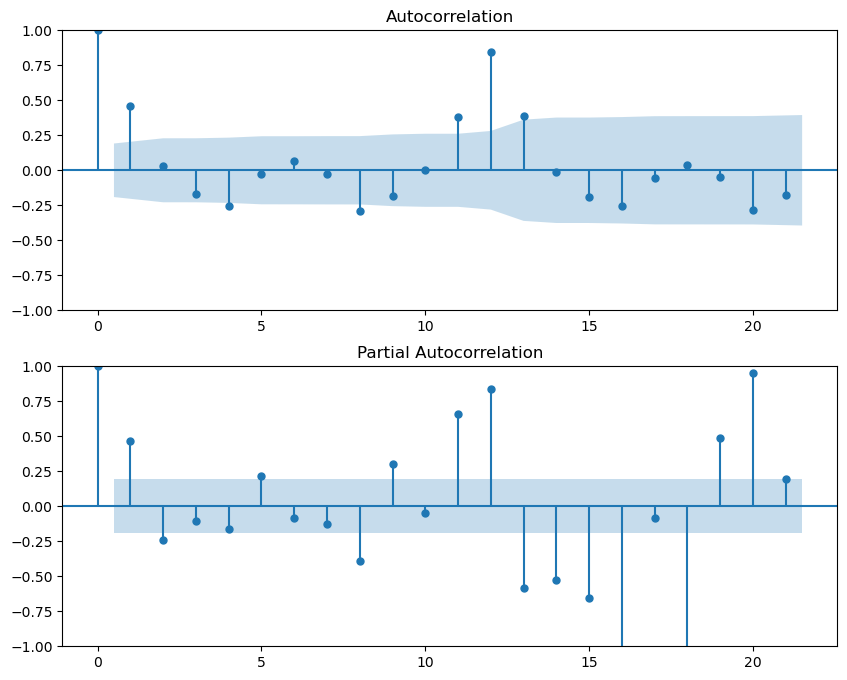

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot ACF and PACF
plot_acf(train['Sales'], ax=ax[0])
plot_pacf(train['Sales'], ax=ax[1])

plt.show()

In [50]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()


print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Mon, 26 Aug 2024   AIC                           1911.627
Time:                        13:30:06   BIC                           1919.560
Sample:                             0   HQIC                          1914.841
                                - 105                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.331      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.0

In [51]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Mon, 26 Aug 2024   AIC                           1911.627
Time:                        13:30:06   BIC                           1919.560
Sample:                             0   HQIC                          1914.841
                                - 105                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.331      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

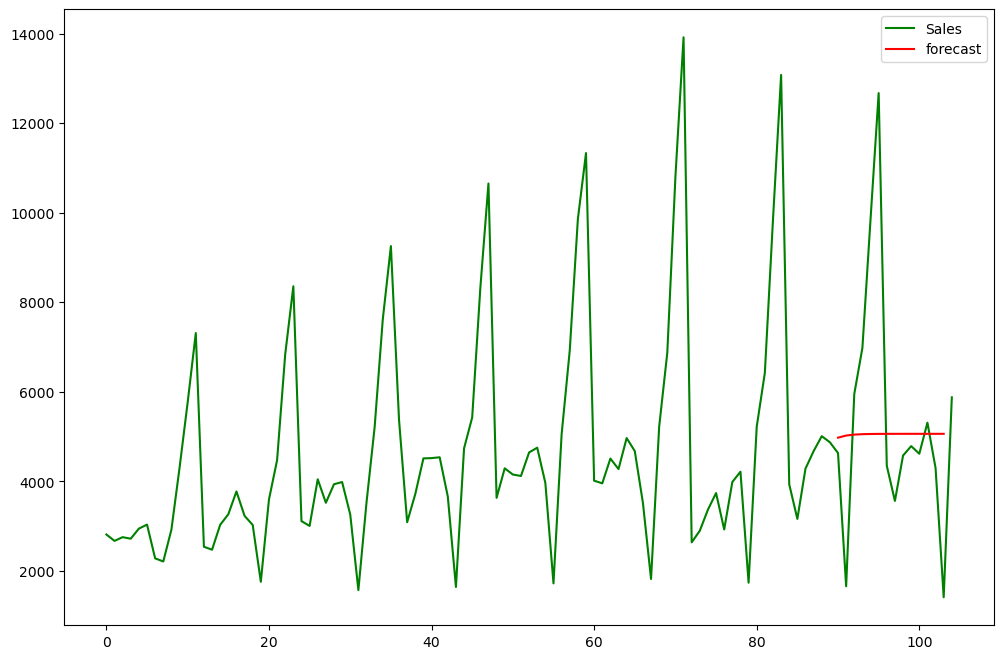

In [52]:
df['forecast'] = model_fit.predict(start=90, end=103, dynamic=True)

# Plot the Sales and forecast with custom colors

df[['Sales', 'forecast']].plot(figsize=(12, 8), color=['green', 'red'])

In [53]:
import statsmodels.api as sm

In [54]:

model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<AxesSubplot:>

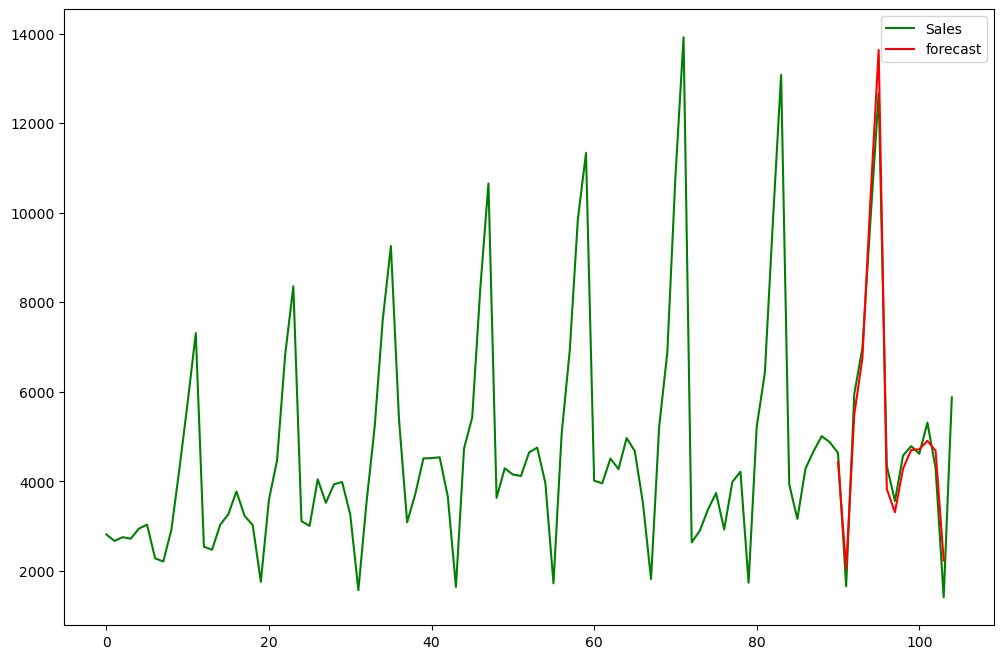

In [55]:
# Assuming `results` is your fitted model
df['forecast'] = results.predict(start=90, end=103, dynamic=True)

# Plot the Sales and forecast with green and red colors
df[['Sales', 'forecast']].plot(figsize=(12, 8), color=['green', 'red'])

In [56]:
future_datest_df.tail()

,Month,Sales,forecast
1971-08-01 00:00:00.000000104,NaN,NaN,NaN
1971-09-01 00:00:00.000000104,NaN,NaN,NaN
1971-10-01 00:00:00.000000104,NaN,NaN,NaN
1971-11-01 00:00:00.000000104,NaN,NaN,NaN
1971-12-01 00:00:00.000000104,NaN,NaN,NaN


In [57]:
future_df=pd.concat([df,future_datest_df])

In [58]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [30]:

from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

C:\Users\Tariq\AppData\Local\Temp\ipykernel_7316\2788891987.py:2: UserWarning: Discarding nonzero nanoseconds in conversion.
  future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]


In [31]:
print (future_dates)

[Timestamp('1970-01-01 00:00:00.000000104'), Timestamp('1970-02-01 00:00:00.000000104'), Timestamp('1970-03-01 00:00:00.000000104'), Timestamp('1970-04-01 00:00:00.000000104'), Timestamp('1970-05-01 00:00:00.000000104'), Timestamp('1970-06-01 00:00:00.000000104'), Timestamp('1970-07-01 00:00:00.000000104'), Timestamp('1970-08-01 00:00:00.000000104'), Timestamp('1970-09-01 00:00:00.000000104'), Timestamp('1970-10-01 00:00:00.000000104'), Timestamp('1970-11-01 00:00:00.000000104'), Timestamp('1970-12-01 00:00:00.000000104'), Timestamp('1971-01-01 00:00:00.000000104'), Timestamp('1971-02-01 00:00:00.000000104'), Timestamp('1971-03-01 00:00:00.000000104'), Timestamp('1971-04-01 00:00:00.000000104'), Timestamp('1971-05-01 00:00:00.000000104'), Timestamp('1971-06-01 00:00:00.000000104'), Timestamp('1971-07-01 00:00:00.000000104'), Timestamp('1971-08-01 00:00:00.000000104'), Timestamp('1971-09-01 00:00:00.000000104'), Timestamp('1971-10-01 00:00:00.000000104'), Timestamp('1971-11-01 00:00:00.

In [32]:

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [33]:
future_datest_df.tail()

,Month,Sales,forecast
1971-08-01 00:00:00.000000104,NaN,NaN,NaN
1971-09-01 00:00:00.000000104,NaN,NaN,NaN
1971-10-01 00:00:00.000000104,NaN,NaN,NaN
1971-11-01 00:00:00.000000104,NaN,NaN,NaN
1971-12-01 00:00:00.000000104,NaN,NaN,NaN


In [34]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

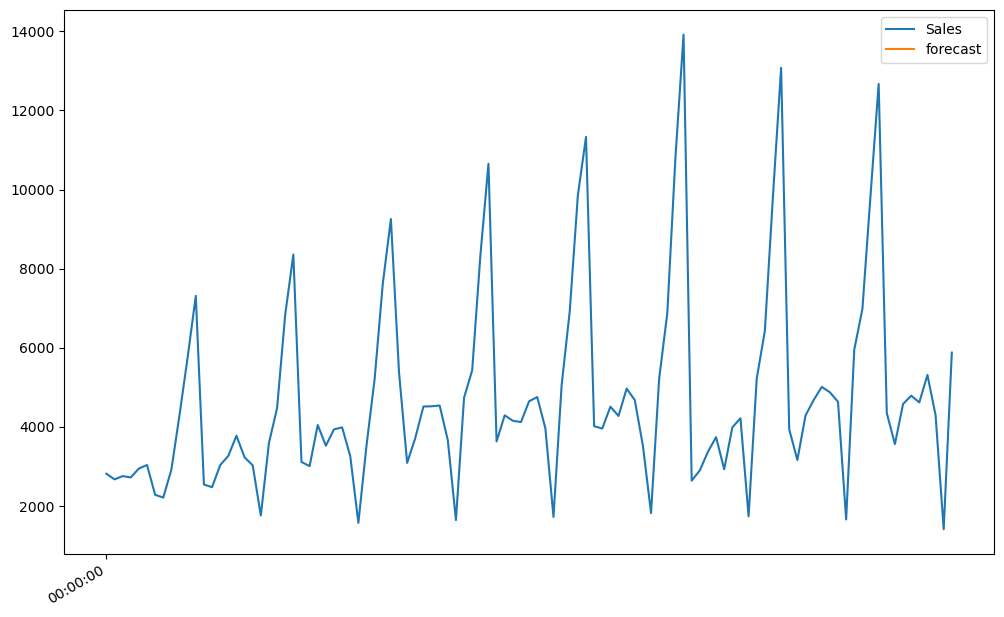

In [35]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 